In [1]:
import keras
import random, os
from keras.layers import *
from keras.models import Model, Sequential
from keras import backend as K
from glob import glob
import numpy as np
import re
from keras.utils.vis_utils import model_to_dot
import random
import matplotlib.pyplot as plt
from scipy.spatial import distance
from IPython.display import Image
import PIL

Using TensorFlow backend.


In [2]:
batch_size = 256
num_classes = 6
epochs = 1000
img_rows, img_cols = 28, 28
label = ["circle", "square", "triangle", "horizontal", "vertical", "diagonal"]

In [3]:
def load_data():
    tr_path = './dataset/trains/'
    te_path = './dataset/tests/'
    va_path = './dataset/vals/'
    
    (tr_sets, tr_labels, _) = get_datasets_labels(tr_path)
    (te_sets, te_labels, test_labels_with_num) = get_datasets_labels(te_path)
    (va_sets, va_labels, _) = get_datasets_labels(va_path)
    
    tr_sets = np.array(tr_sets)
    te_sets = np.array(te_sets)
    va_sets = np.array(va_sets)
    tr_labels = np.array(tr_labels)
    te_labels = np.array(te_labels)
    va_labels = np.array(va_labels)
    test_labels_with_num = np.array(test_labels_with_num)
    return tr_sets, tr_labels, te_sets, te_labels, va_sets, va_labels, test_labels_with_num

In [4]:
def get_datasets_labels(path):
	files = os.listdir(path)
	labels = []
	lbs = []
	sets = []
	for file in files:
		pic = PIL.Image.open(path + file).convert('L')
		lb = file.replace(re.findall("\d+", file)[0], '').replace('.png', '') 
		forlb = file.replace('.png', '') 
		
		labels.append(label.index(lb))
		lbs.append(forlb)
		
		pic = np.array(pic)
		sets.append(pic)
	return sets, labels, lbs

In [5]:
(x_train, y_train, x_test, y_test, x_val, y_val, test_labels_with_num) = load_data()
y_test1 = y_test
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)
y_val = keras.utils.to_categorical(y_val, num_classes)
input_shape = (img_rows, img_cols, 1)

x_train = x_train.reshape(x_train.shape[0], img_rows, img_cols, 1)
x_test = x_test.reshape(x_test.shape[0], img_rows, img_cols, 1)
x_val = x_val.reshape(x_val.shape[0], img_rows, img_cols, 1)
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_val = x_val.astype('float32')
x_train /= 255.
x_test /= 255.
x_val /= 255.

In [6]:
model = Sequential()
model.add(Conv2D(128, (3, 3), padding='same', input_shape=input_shape))
model.add(Activation('relu'))
model.add(MaxPooling2D((2, 2), padding='same'))

model.add(Conv2D(128, (3, 3), padding='same'))
model.add(Activation('relu'))
model.add(MaxPooling2D((2, 2), padding='same'))
#

model.add(Conv2D(64, (3, 3), padding='same'))
model.add(Activation('relu'))
model.add(MaxPooling2D((2, 2), padding='same'))

model.add(Conv2D(64, (3, 3), padding='same'))
model.add(Activation('relu'))
model.add(MaxPooling2D((2, 2), padding='same'))

model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.25))

model.add(Dense(64, activation = 'relu'))

#model.add(Dropout(0.25))
model.add(Dense(num_classes))
model.add(Activation('softmax'))

In [7]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 28, 28, 128)       1280      
_________________________________________________________________
activation_1 (Activation)    (None, 28, 28, 128)       0         
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 14, 14, 128)       0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 14, 14, 128)       147584    
_________________________________________________________________
activation_2 (Activation)    (None, 14, 14, 128)       0         
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 7, 7, 128)         0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 7, 7, 64)          73792     
__________

In [8]:
num = 1
for layer in model.layers:
    print(num, layer, layer.trainable)
    num = num+1

1 <keras.layers.convolutional.Conv2D object at 0x7f88e34dd1d0> True
2 <keras.layers.core.Activation object at 0x7f88e34dd400> True
3 <keras.layers.pooling.MaxPooling2D object at 0x7f88e34dd6a0> True
4 <keras.layers.convolutional.Conv2D object at 0x7f88e34dd780> True
5 <keras.layers.core.Activation object at 0x7f88e31b8da0> True
6 <keras.layers.pooling.MaxPooling2D object at 0x7f88e31b8d30> True
7 <keras.layers.convolutional.Conv2D object at 0x7f88e313c470> True
8 <keras.layers.core.Activation object at 0x7f88e313c550> True
9 <keras.layers.pooling.MaxPooling2D object at 0x7f88e313fbe0> True
10 <keras.layers.convolutional.Conv2D object at 0x7f88e313fb00> True
11 <keras.layers.core.Activation object at 0x7f88e30d34a8> True
12 <keras.layers.pooling.MaxPooling2D object at 0x7f88e30d3908> True
13 <keras.layers.core.Flatten object at 0x7f88e30ef518> True
14 <keras.layers.core.Dense object at 0x7f88e30efc18> True
15 <keras.layers.core.Dropout object at 0x7f88e310a128> True
16 <keras.layers.cor

In [9]:
model.compile(loss=keras.losses.categorical_crossentropy,
              optimizer=keras.optimizers.Adadelta(),
              metrics=['accuracy'])

In [10]:
model.fit(x_train, y_train,
          batch_size=batch_size,
          epochs=epochs,
          verbose=1, validation_data=(x_val, y_val))

score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])


Train on 2400 samples, validate on 1800 samples
Epoch 1/1000
2400/2400 [==============================] - 2s 678us/step - loss: 1.7934 - acc: 0.1671 - val_loss: 1.7911 - val_acc: 0.2011
Epoch 2/1000
2400/2400 [==============================] - 0s 55us/step - loss: 1.7921 - acc: 0.1696 - val_loss: 1.7908 - val_acc: 0.1667
Epoch 3/1000
2400/2400 [==============================] - 0s 67us/step - loss: 1.7903 - acc: 0.1821 - val_loss: 1.7836 - val_acc: 0.2589
Epoch 4/1000
2400/2400 [==============================] - 0s 66us/step - loss: 1.7872 - acc: 0.1796 - val_loss: 1.7883 - val_acc: 0.1667
Epoch 5/1000
2400/2400 [==============================] - 0s 85us/step - loss: 1.7834 - acc: 0.1917 - val_loss: 1.7662 - val_acc: 0.3000
Epoch 6/1000
2400/2400 [==============================] - 0s 70us/step - loss: 1.7660 - acc: 0.2600 - val_loss: 1.7342 - val_acc: 0.2017
Epoch 7/1000
2400/2400 [==============================] - 0s 71us/step - loss: 1.7356 - acc: 0.2679 - val_loss: 1.6527 - val_acc:

2400/2400 [==============================] - 0s 62us/step - loss: 0.0062 - acc: 0.9996 - val_loss: 0.0760 - val_acc: 0.9806
Epoch 61/1000
2400/2400 [==============================] - 0s 70us/step - loss: 0.0063 - acc: 0.9996 - val_loss: 0.0753 - val_acc: 0.9817
Epoch 62/1000
2400/2400 [==============================] - 0s 74us/step - loss: 0.0091 - acc: 0.9979 - val_loss: 0.0671 - val_acc: 0.9811
Epoch 63/1000
2400/2400 [==============================] - 0s 94us/step - loss: 0.0056 - acc: 0.9996 - val_loss: 0.0640 - val_acc: 0.9828
Epoch 64/1000
2400/2400 [==============================] - 0s 86us/step - loss: 0.0054 - acc: 0.9992 - val_loss: 0.0662 - val_acc: 0.9822
Epoch 65/1000
2400/2400 [==============================] - 0s 72us/step - loss: 0.0056 - acc: 0.9992 - val_loss: 0.0701 - val_acc: 0.9806
Epoch 66/1000
2400/2400 [==============================] - 0s 66us/step - loss: 0.0679 - acc: 0.9796 - val_loss: 0.0838 - val_acc: 0.9717
Epoch 67/1000
2400/2400 [=======================

Epoch 119/1000
2400/2400 [==============================] - 0s 72us/step - loss: 0.0031 - acc: 0.9996 - val_loss: 0.0557 - val_acc: 0.9861
Epoch 120/1000
2400/2400 [==============================] - 0s 83us/step - loss: 0.0016 - acc: 1.0000 - val_loss: 0.0568 - val_acc: 0.9856
Epoch 121/1000
2400/2400 [==============================] - 0s 78us/step - loss: 0.0014 - acc: 1.0000 - val_loss: 0.0580 - val_acc: 0.9850
Epoch 122/1000
2400/2400 [==============================] - 0s 78us/step - loss: 0.0014 - acc: 1.0000 - val_loss: 0.0606 - val_acc: 0.9839
Epoch 123/1000
2400/2400 [==============================] - 0s 87us/step - loss: 0.0019 - acc: 0.9992 - val_loss: 0.0573 - val_acc: 0.9856
Epoch 124/1000
2400/2400 [==============================] - 0s 96us/step - loss: 9.1378e-04 - acc: 1.0000 - val_loss: 0.0585 - val_acc: 0.9861
Epoch 125/1000
2400/2400 [==============================] - 0s 75us/step - loss: 0.0011 - acc: 1.0000 - val_loss: 0.0581 - val_acc: 0.9861
Epoch 126/1000
2400/240

2400/2400 [==============================] - 0s 55us/step - loss: 2.9871e-04 - acc: 1.0000 - val_loss: 0.0624 - val_acc: 0.9867
Epoch 177/1000
2400/2400 [==============================] - 0s 60us/step - loss: 2.3464e-04 - acc: 1.0000 - val_loss: 0.0649 - val_acc: 0.9856
Epoch 178/1000
2400/2400 [==============================] - 0s 84us/step - loss: 2.7493e-04 - acc: 1.0000 - val_loss: 0.0706 - val_acc: 0.9850
Epoch 179/1000
2400/2400 [==============================] - 0s 74us/step - loss: 2.3775e-04 - acc: 1.0000 - val_loss: 0.0663 - val_acc: 0.9861
Epoch 180/1000
2400/2400 [==============================] - 0s 78us/step - loss: 1.6704e-04 - acc: 1.0000 - val_loss: 0.0642 - val_acc: 0.9867
Epoch 181/1000
2400/2400 [==============================] - 0s 68us/step - loss: 1.8482e-04 - acc: 1.0000 - val_loss: 0.0647 - val_acc: 0.9861
Epoch 182/1000
2400/2400 [==============================] - 0s 77us/step - loss: 1.6614e-04 - acc: 1.0000 - val_loss: 0.0684 - val_acc: 0.9861
Epoch 183/1000

2400/2400 [==============================] - 0s 62us/step - loss: 4.9548e-05 - acc: 1.0000 - val_loss: 0.0743 - val_acc: 0.9861
Epoch 234/1000
2400/2400 [==============================] - 0s 76us/step - loss: 3.4125e-05 - acc: 1.0000 - val_loss: 0.0752 - val_acc: 0.9850
Epoch 235/1000
2400/2400 [==============================] - 0s 90us/step - loss: 5.0054e-05 - acc: 1.0000 - val_loss: 0.0756 - val_acc: 0.9856
Epoch 236/1000
2400/2400 [==============================] - 0s 92us/step - loss: 4.6711e-05 - acc: 1.0000 - val_loss: 0.0780 - val_acc: 0.9856
Epoch 237/1000
2400/2400 [==============================] - 0s 80us/step - loss: 1.0474e-04 - acc: 1.0000 - val_loss: 0.0828 - val_acc: 0.9861
Epoch 238/1000
2400/2400 [==============================] - 0s 76us/step - loss: 5.7565e-05 - acc: 1.0000 - val_loss: 0.0815 - val_acc: 0.9861
Epoch 239/1000
2400/2400 [==============================] - 0s 87us/step - loss: 3.5320e-05 - acc: 1.0000 - val_loss: 0.0810 - val_acc: 0.9856
Epoch 240/1000

2400/2400 [==============================] - 0s 63us/step - loss: 2.6736e-05 - acc: 1.0000 - val_loss: 0.0806 - val_acc: 0.9861
Epoch 291/1000
2400/2400 [==============================] - 0s 75us/step - loss: 2.7933e-05 - acc: 1.0000 - val_loss: 0.0852 - val_acc: 0.9850
Epoch 292/1000
2400/2400 [==============================] - 0s 97us/step - loss: 1.6658e-05 - acc: 1.0000 - val_loss: 0.0850 - val_acc: 0.9850
Epoch 293/1000
2400/2400 [==============================] - 0s 87us/step - loss: 2.8604e-05 - acc: 1.0000 - val_loss: 0.0865 - val_acc: 0.9856
Epoch 294/1000
2400/2400 [==============================] - 0s 76us/step - loss: 1.6248e-05 - acc: 1.0000 - val_loss: 0.0864 - val_acc: 0.9850
Epoch 295/1000
2400/2400 [==============================] - 0s 88us/step - loss: 3.2146e-05 - acc: 1.0000 - val_loss: 0.0836 - val_acc: 0.9850
Epoch 296/1000
2400/2400 [==============================] - 0s 80us/step - loss: 4.7782e-05 - acc: 1.0000 - val_loss: 0.0874 - val_acc: 0.9856
Epoch 297/1000

2400/2400 [==============================] - 0s 69us/step - loss: 1.0678e-05 - acc: 1.0000 - val_loss: 0.0816 - val_acc: 0.9861
Epoch 348/1000
2400/2400 [==============================] - 0s 65us/step - loss: 2.3716e-05 - acc: 1.0000 - val_loss: 0.0812 - val_acc: 0.9861
Epoch 349/1000
2400/2400 [==============================] - 0s 87us/step - loss: 6.7246e-05 - acc: 1.0000 - val_loss: 0.0828 - val_acc: 0.9844
Epoch 350/1000
2400/2400 [==============================] - 0s 83us/step - loss: 2.3382e-05 - acc: 1.0000 - val_loss: 0.0837 - val_acc: 0.9839
Epoch 351/1000
2400/2400 [==============================] - 0s 83us/step - loss: 1.8232e-05 - acc: 1.0000 - val_loss: 0.0829 - val_acc: 0.9844
Epoch 352/1000
2400/2400 [==============================] - 0s 80us/step - loss: 2.0214e-05 - acc: 1.0000 - val_loss: 0.0835 - val_acc: 0.9844
Epoch 353/1000
2400/2400 [==============================] - 0s 82us/step - loss: 1.2198e-05 - acc: 1.0000 - val_loss: 0.0836 - val_acc: 0.9844
Epoch 354/1000

2400/2400 [==============================] - 0s 67us/step - loss: 5.7041e-05 - acc: 1.0000 - val_loss: 0.0656 - val_acc: 0.9867
Epoch 405/1000
2400/2400 [==============================] - 0s 72us/step - loss: 2.3350e-05 - acc: 1.0000 - val_loss: 0.0649 - val_acc: 0.9867
Epoch 406/1000
2400/2400 [==============================] - 0s 76us/step - loss: 2.3768e-05 - acc: 1.0000 - val_loss: 0.0661 - val_acc: 0.9867
Epoch 407/1000
2400/2400 [==============================] - 0s 76us/step - loss: 1.2713e-05 - acc: 1.0000 - val_loss: 0.0657 - val_acc: 0.9867
Epoch 408/1000
2400/2400 [==============================] - 0s 80us/step - loss: 1.8444e-05 - acc: 1.0000 - val_loss: 0.0666 - val_acc: 0.9867
Epoch 409/1000
2400/2400 [==============================] - 0s 79us/step - loss: 2.9373e-05 - acc: 1.0000 - val_loss: 0.0659 - val_acc: 0.9872
Epoch 410/1000
2400/2400 [==============================] - 0s 63us/step - loss: 2.4955e-05 - acc: 1.0000 - val_loss: 0.0675 - val_acc: 0.9872
Epoch 411/1000

2400/2400 [==============================] - 0s 76us/step - loss: 2.1734e-05 - acc: 1.0000 - val_loss: 0.0725 - val_acc: 0.9861
Epoch 462/1000
2400/2400 [==============================] - 0s 90us/step - loss: 2.1100e-05 - acc: 1.0000 - val_loss: 0.0722 - val_acc: 0.9856
Epoch 463/1000
2400/2400 [==============================] - 0s 81us/step - loss: 6.7228e-05 - acc: 1.0000 - val_loss: 0.0750 - val_acc: 0.9856
Epoch 464/1000
2400/2400 [==============================] - 0s 81us/step - loss: 4.8146e-05 - acc: 1.0000 - val_loss: 0.0741 - val_acc: 0.9856
Epoch 465/1000
2400/2400 [==============================] - 0s 92us/step - loss: 1.7565e-05 - acc: 1.0000 - val_loss: 0.0737 - val_acc: 0.9839
Epoch 466/1000
2400/2400 [==============================] - 0s 96us/step - loss: 8.2147e-06 - acc: 1.0000 - val_loss: 0.0733 - val_acc: 0.9844
Epoch 467/1000
2400/2400 [==============================] - 0s 92us/step - loss: 1.5852e-04 - acc: 1.0000 - val_loss: 0.0885 - val_acc: 0.9844
Epoch 468/1000

2400/2400 [==============================] - 0s 72us/step - loss: 7.6247e-06 - acc: 1.0000 - val_loss: 0.0795 - val_acc: 0.9861
Epoch 519/1000
2400/2400 [==============================] - 0s 57us/step - loss: 2.9063e-05 - acc: 1.0000 - val_loss: 0.0824 - val_acc: 0.9861
Epoch 520/1000
2400/2400 [==============================] - 0s 73us/step - loss: 7.1933e-06 - acc: 1.0000 - val_loss: 0.0819 - val_acc: 0.9861
Epoch 521/1000
2400/2400 [==============================] - 0s 77us/step - loss: 7.9646e-06 - acc: 1.0000 - val_loss: 0.0809 - val_acc: 0.9867
Epoch 522/1000
2400/2400 [==============================] - 0s 99us/step - loss: 4.9650e-06 - acc: 1.0000 - val_loss: 0.0807 - val_acc: 0.9867
Epoch 523/1000
2400/2400 [==============================] - 0s 96us/step - loss: 9.1413e-06 - acc: 1.0000 - val_loss: 0.0796 - val_acc: 0.9867
Epoch 524/1000
2400/2400 [==============================] - 0s 87us/step - loss: 5.8779e-06 - acc: 1.0000 - val_loss: 0.0793 - val_acc: 0.9867
Epoch 525/1000

2400/2400 [==============================] - 0s 70us/step - loss: 5.2599e-05 - acc: 1.0000 - val_loss: 0.0714 - val_acc: 0.9878
Epoch 576/1000
2400/2400 [==============================] - 0s 70us/step - loss: 7.4192e-06 - acc: 1.0000 - val_loss: 0.0726 - val_acc: 0.9872
Epoch 577/1000
2400/2400 [==============================] - 0s 98us/step - loss: 1.3267e-05 - acc: 1.0000 - val_loss: 0.0730 - val_acc: 0.9861
Epoch 578/1000
2400/2400 [==============================] - 0s 95us/step - loss: 1.7335e-05 - acc: 1.0000 - val_loss: 0.0746 - val_acc: 0.9872
Epoch 579/1000
2400/2400 [==============================] - 0s 93us/step - loss: 4.5547e-06 - acc: 1.0000 - val_loss: 0.0749 - val_acc: 0.9878
Epoch 580/1000
2400/2400 [==============================] - 0s 83us/step - loss: 1.3534e-04 - acc: 1.0000 - val_loss: 0.0734 - val_acc: 0.9883
Epoch 581/1000
2400/2400 [==============================] - 0s 83us/step - loss: 1.1627e-05 - acc: 1.0000 - val_loss: 0.0738 - val_acc: 0.9872
Epoch 582/1000

2400/2400 [==============================] - 0s 60us/step - loss: 5.5103e-06 - acc: 1.0000 - val_loss: 0.0882 - val_acc: 0.9850
Epoch 633/1000
2400/2400 [==============================] - 0s 71us/step - loss: 4.9043e-06 - acc: 1.0000 - val_loss: 0.0874 - val_acc: 0.9850
Epoch 634/1000
2400/2400 [==============================] - 0s 76us/step - loss: 6.7251e-06 - acc: 1.0000 - val_loss: 0.0868 - val_acc: 0.9856
Epoch 635/1000
2400/2400 [==============================] - 0s 88us/step - loss: 3.0629e-06 - acc: 1.0000 - val_loss: 0.0867 - val_acc: 0.9856
Epoch 636/1000
2400/2400 [==============================] - 0s 79us/step - loss: 7.9233e-06 - acc: 1.0000 - val_loss: 0.0861 - val_acc: 0.9861
Epoch 637/1000
2400/2400 [==============================] - 0s 75us/step - loss: 8.9446e-06 - acc: 1.0000 - val_loss: 0.0862 - val_acc: 0.9861
Epoch 638/1000
2400/2400 [==============================] - 0s 73us/step - loss: 2.5770e-05 - acc: 1.0000 - val_loss: 0.0807 - val_acc: 0.9861
Epoch 639/1000

2400/2400 [==============================] - 0s 65us/step - loss: 2.0179e-06 - acc: 1.0000 - val_loss: 0.0850 - val_acc: 0.9867
Epoch 690/1000
2400/2400 [==============================] - 0s 58us/step - loss: 3.4288e-06 - acc: 1.0000 - val_loss: 0.0848 - val_acc: 0.9867
Epoch 691/1000
2400/2400 [==============================] - 0s 67us/step - loss: 1.4492e-05 - acc: 1.0000 - val_loss: 0.0843 - val_acc: 0.9861
Epoch 692/1000
2400/2400 [==============================] - 0s 70us/step - loss: 2.1680e-05 - acc: 1.0000 - val_loss: 0.0891 - val_acc: 0.9856
Epoch 693/1000
2400/2400 [==============================] - 0s 72us/step - loss: 5.6731e-06 - acc: 1.0000 - val_loss: 0.0881 - val_acc: 0.9856
Epoch 694/1000
2400/2400 [==============================] - 0s 72us/step - loss: 2.8427e-06 - acc: 1.0000 - val_loss: 0.0879 - val_acc: 0.9856
Epoch 695/1000
2400/2400 [==============================] - 0s 76us/step - loss: 1.3146e-05 - acc: 1.0000 - val_loss: 0.0881 - val_acc: 0.9856
Epoch 696/1000

2400/2400 [==============================] - 0s 68us/step - loss: 3.9707e-06 - acc: 1.0000 - val_loss: 0.0868 - val_acc: 0.9844
Epoch 747/1000
2400/2400 [==============================] - 0s 68us/step - loss: 7.7938e-06 - acc: 1.0000 - val_loss: 0.0867 - val_acc: 0.9844
Epoch 748/1000
2400/2400 [==============================] - 0s 84us/step - loss: 6.5623e-06 - acc: 1.0000 - val_loss: 0.0872 - val_acc: 0.9844
Epoch 749/1000
2400/2400 [==============================] - 0s 78us/step - loss: 6.6931e-06 - acc: 1.0000 - val_loss: 0.0867 - val_acc: 0.9844
Epoch 750/1000
2400/2400 [==============================] - 0s 73us/step - loss: 5.9615e-06 - acc: 1.0000 - val_loss: 0.0865 - val_acc: 0.9850
Epoch 751/1000
2400/2400 [==============================] - 0s 72us/step - loss: 1.5410e-05 - acc: 1.0000 - val_loss: 0.0861 - val_acc: 0.9850
Epoch 752/1000
2400/2400 [==============================] - 0s 73us/step - loss: 2.1482e-06 - acc: 1.0000 - val_loss: 0.0860 - val_acc: 0.9850
Epoch 753/1000

2400/2400 [==============================] - 0s 68us/step - loss: 2.9522e-06 - acc: 1.0000 - val_loss: 0.0857 - val_acc: 0.9867
Epoch 804/1000
2400/2400 [==============================] - 0s 64us/step - loss: 2.4075e-06 - acc: 1.0000 - val_loss: 0.0858 - val_acc: 0.9867
Epoch 805/1000
2400/2400 [==============================] - 0s 79us/step - loss: 5.1640e-06 - acc: 1.0000 - val_loss: 0.0858 - val_acc: 0.9867
Epoch 806/1000
2400/2400 [==============================] - 0s 89us/step - loss: 1.1344e-05 - acc: 1.0000 - val_loss: 0.0866 - val_acc: 0.9861
Epoch 807/1000
2400/2400 [==============================] - 0s 58us/step - loss: 1.0523e-05 - acc: 1.0000 - val_loss: 0.0882 - val_acc: 0.9861
Epoch 808/1000
2400/2400 [==============================] - 0s 81us/step - loss: 4.3571e-05 - acc: 1.0000 - val_loss: 0.0910 - val_acc: 0.9856
Epoch 809/1000
2400/2400 [==============================] - 0s 100us/step - loss: 2.3564e-06 - acc: 1.0000 - val_loss: 0.0909 - val_acc: 0.9856
Epoch 810/100

2400/2400 [==============================] - 0s 67us/step - loss: 2.9896e-06 - acc: 1.0000 - val_loss: 0.0956 - val_acc: 0.9861
Epoch 861/1000
2400/2400 [==============================] - 0s 97us/step - loss: 9.1018e-06 - acc: 1.0000 - val_loss: 0.0952 - val_acc: 0.9861
Epoch 862/1000
2400/2400 [==============================] - 0s 83us/step - loss: 2.9428e-06 - acc: 1.0000 - val_loss: 0.0953 - val_acc: 0.9861
Epoch 863/1000
2400/2400 [==============================] - 0s 83us/step - loss: 3.0294e-06 - acc: 1.0000 - val_loss: 0.0951 - val_acc: 0.9861
Epoch 864/1000
2400/2400 [==============================] - 0s 87us/step - loss: 2.0225e-06 - acc: 1.0000 - val_loss: 0.0949 - val_acc: 0.9861
Epoch 865/1000
2400/2400 [==============================] - 0s 80us/step - loss: 6.4835e-06 - acc: 1.0000 - val_loss: 0.0939 - val_acc: 0.9867
Epoch 866/1000
2400/2400 [==============================] - 0s 80us/step - loss: 2.3505e-06 - acc: 1.0000 - val_loss: 0.0938 - val_acc: 0.9867
Epoch 867/1000

2400/2400 [==============================] - 0s 64us/step - loss: 5.6239e-06 - acc: 1.0000 - val_loss: 0.0769 - val_acc: 0.9878
Epoch 918/1000
2400/2400 [==============================] - 0s 73us/step - loss: 5.0467e-06 - acc: 1.0000 - val_loss: 0.0774 - val_acc: 0.9878
Epoch 919/1000
2400/2400 [==============================] - 0s 96us/step - loss: 4.6335e-06 - acc: 1.0000 - val_loss: 0.0775 - val_acc: 0.9878
Epoch 920/1000
2400/2400 [==============================] - 0s 86us/step - loss: 8.6374e-06 - acc: 1.0000 - val_loss: 0.0778 - val_acc: 0.9878
Epoch 921/1000
2400/2400 [==============================] - 0s 80us/step - loss: 9.8044e-06 - acc: 1.0000 - val_loss: 0.0775 - val_acc: 0.9878
Epoch 922/1000
2400/2400 [==============================] - 0s 98us/step - loss: 8.3845e-06 - acc: 1.0000 - val_loss: 0.0766 - val_acc: 0.9889
Epoch 923/1000
2400/2400 [==============================] - 0s 96us/step - loss: 1.3773e-05 - acc: 1.0000 - val_loss: 0.0772 - val_acc: 0.9889
Epoch 924/1000

2400/2400 [==============================] - 0s 58us/step - loss: 1.5700e-05 - acc: 1.0000 - val_loss: 0.0830 - val_acc: 0.9867
Epoch 975/1000
2400/2400 [==============================] - 0s 62us/step - loss: 3.3814e-06 - acc: 1.0000 - val_loss: 0.0828 - val_acc: 0.9867
Epoch 976/1000
2400/2400 [==============================] - 0s 62us/step - loss: 3.5209e-06 - acc: 1.0000 - val_loss: 0.0822 - val_acc: 0.9867
Epoch 977/1000
2400/2400 [==============================] - 0s 77us/step - loss: 2.7097e-06 - acc: 1.0000 - val_loss: 0.0820 - val_acc: 0.9867
Epoch 978/1000
2400/2400 [==============================] - 0s 79us/step - loss: 4.1901e-06 - acc: 1.0000 - val_loss: 0.0819 - val_acc: 0.9867
Epoch 979/1000
2400/2400 [==============================] - 0s 77us/step - loss: 1.0072e-05 - acc: 1.0000 - val_loss: 0.0817 - val_acc: 0.9867
Epoch 980/1000
2400/2400 [==============================] - 0s 77us/step - loss: 5.5530e-06 - acc: 1.0000 - val_loss: 0.0814 - val_acc: 0.9867
Epoch 981/1000

In [11]:
model_json = model.to_json()
with open("origin_cnn_model.json", "w") as json_file : 
    json_file.write(model_json)

In [12]:
model.save_weights("origin_cnn_model.h5")
print("saved model to disk")

saved model to disk


In [13]:
origin_model = model

In [14]:
for layer in model.layers:
    layer.trainable = False

In [15]:
prev_model = model
for i in range(6):
    prev_model.pop()
prev_model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 28, 28, 128)       1280      
_________________________________________________________________
activation_1 (Activation)    (None, 28, 28, 128)       0         
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 14, 14, 128)       0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 14, 14, 128)       147584    
_________________________________________________________________
activation_2 (Activation)    (None, 14, 14, 128)       0         
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 7, 7, 128)         0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 7, 7, 64)          73792     
__________

/home/minji/.conda/envs/tensor/lib/python3.6/site-packages/keras/engine/training.py:490: UserWarning: Discrepancy between trainable weights and collected trainable weights, did you set `model.trainable` without calling `model.compile` after ?
  'Discrepancy between trainable weights and collected trainable'


In [16]:
new_model = prev_model

In [17]:
new_model.add(Conv2D(64, (3, 3), padding='same'))
new_model.add(Activation('relu'))
new_model.add(UpSampling2D((2, 2)))

new_model.add(Conv2D(64, (3, 3), padding='same'))
new_model.add(Activation('relu'))
new_model.add(UpSampling2D((2, 2)))

new_model.add(Conv2D(64, (2, 2)))
new_model.add(Conv2D(128, (3, 3), padding='same'))
new_model.add(Activation('relu'))
new_model.add(UpSampling2D((2, 2)))

new_model.add(Conv2D(128, (3, 3), padding='same'))
new_model.add(Activation('relu'))
new_model.add(UpSampling2D((2, 2)))

new_model.add(Conv2D(1, (3, 3), padding='same'))
new_model.add(Activation('relu'))

In [18]:
new_model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 28, 28, 128)       1280      
_________________________________________________________________
activation_1 (Activation)    (None, 28, 28, 128)       0         
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 14, 14, 128)       0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 14, 14, 128)       147584    
_________________________________________________________________
activation_2 (Activation)    (None, 14, 14, 128)       0         
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 7, 7, 128)         0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 7, 7, 64)          73792     
__________

In [19]:
num = 1
for layer in new_model.layers:
    print(num, layer, layer.trainable)
    num = num+1

1 <keras.layers.convolutional.Conv2D object at 0x7f88e34dd1d0> False
2 <keras.layers.core.Activation object at 0x7f88e34dd400> False
3 <keras.layers.pooling.MaxPooling2D object at 0x7f88e34dd6a0> False
4 <keras.layers.convolutional.Conv2D object at 0x7f88e34dd780> False
5 <keras.layers.core.Activation object at 0x7f88e31b8da0> False
6 <keras.layers.pooling.MaxPooling2D object at 0x7f88e31b8d30> False
7 <keras.layers.convolutional.Conv2D object at 0x7f88e313c470> False
8 <keras.layers.core.Activation object at 0x7f88e313c550> False
9 <keras.layers.pooling.MaxPooling2D object at 0x7f88e313fbe0> False
10 <keras.layers.convolutional.Conv2D object at 0x7f88e313fb00> False
11 <keras.layers.core.Activation object at 0x7f88e30d34a8> False
12 <keras.layers.pooling.MaxPooling2D object at 0x7f88e30d3908> False
13 <keras.layers.convolutional.Conv2D object at 0x7f88e006d2e8> True
14 <keras.layers.core.Activation object at 0x7f88e006d2b0> True
15 <keras.layers.convolutional.UpSampling2D object at 0x

In [20]:
new_model.compile(optimizer='adadelta', loss='binary_crossentropy')

In [21]:
new_model.fit(x_train, x_train,
        batch_size=batch_size,
        epochs=epochs,
        verbose=1, 
        shuffle = True,
        validation_data=(x_val, x_val))

Train on 2400 samples, validate on 1800 samples
Epoch 1/1000
2400/2400 [==============================] - 1s 274us/step - loss: 1.9869 - val_loss: 1.0024
Epoch 2/1000
2400/2400 [==============================] - 0s 85us/step - loss: 0.9906 - val_loss: 0.8857
Epoch 3/1000
2400/2400 [==============================] - 0s 87us/step - loss: 0.8799 - val_loss: 0.9761
Epoch 4/1000
2400/2400 [==============================] - 0s 102us/step - loss: 0.8747 - val_loss: 0.7775
Epoch 5/1000
2400/2400 [==============================] - 0s 93us/step - loss: 0.8003 - val_loss: 0.7234
Epoch 6/1000
2400/2400 [==============================] - 0s 96us/step - loss: 0.7708 - val_loss: 0.7006
Epoch 7/1000
2400/2400 [==============================] - 0s 83us/step - loss: 0.7651 - val_loss: 0.8280
Epoch 8/1000
2400/2400 [==============================] - 0s 84us/step - loss: 0.8340 - val_loss: 0.7949
Epoch 9/1000
2400/2400 [==============================] - 0s 91us/step - loss: 0.7878 - val_loss: 0.7132
Epoch

Epoch 78/1000
2400/2400 [==============================] - 0s 100us/step - loss: 0.5160 - val_loss: 0.5187
Epoch 79/1000
2400/2400 [==============================] - 0s 90us/step - loss: 0.5232 - val_loss: 0.5147
Epoch 80/1000
2400/2400 [==============================] - 0s 85us/step - loss: 0.5175 - val_loss: 0.5095
Epoch 81/1000
2400/2400 [==============================] - 0s 90us/step - loss: 0.5220 - val_loss: 0.5084
Epoch 82/1000
2400/2400 [==============================] - 0s 100us/step - loss: 0.5289 - val_loss: 0.5075
Epoch 83/1000
2400/2400 [==============================] - 0s 96us/step - loss: 0.5137 - val_loss: 0.5076
Epoch 84/1000
2400/2400 [==============================] - 0s 91us/step - loss: 0.5076 - val_loss: 0.5250
Epoch 85/1000
2400/2400 [==============================] - 0s 90us/step - loss: 0.5139 - val_loss: 0.5492
Epoch 86/1000
2400/2400 [==============================] - 0s 100us/step - loss: 0.5147 - val_loss: 0.5276
Epoch 87/1000
2400/2400 [==================

2400/2400 [==============================] - 0s 90us/step - loss: 0.5027 - val_loss: 0.5122
Epoch 155/1000
2400/2400 [==============================] - 0s 93us/step - loss: 0.5035 - val_loss: 0.5118
Epoch 156/1000
2400/2400 [==============================] - 0s 105us/step - loss: 0.4968 - val_loss: 0.5136
Epoch 157/1000
2400/2400 [==============================] - 0s 97us/step - loss: 0.5051 - val_loss: 0.5114
Epoch 158/1000
2400/2400 [==============================] - 0s 91us/step - loss: 0.4987 - val_loss: 0.5114
Epoch 159/1000
2400/2400 [==============================] - 0s 98us/step - loss: 0.4962 - val_loss: 0.5116
Epoch 160/1000
2400/2400 [==============================] - 0s 103us/step - loss: 0.5069 - val_loss: 0.5158
Epoch 161/1000
2400/2400 [==============================] - 0s 106us/step - loss: 0.5043 - val_loss: 0.5137
Epoch 162/1000
2400/2400 [==============================] - 0s 106us/step - loss: 0.5034 - val_loss: 0.5350
Epoch 163/1000
2400/2400 [======================

2400/2400 [==============================] - 0s 85us/step - loss: 0.4927 - val_loss: 0.5411
Epoch 231/1000
2400/2400 [==============================] - 0s 107us/step - loss: 0.4852 - val_loss: 0.5334
Epoch 232/1000
2400/2400 [==============================] - 0s 105us/step - loss: 0.4850 - val_loss: 0.5173
Epoch 233/1000
2400/2400 [==============================] - 0s 100us/step - loss: 0.4938 - val_loss: 0.5208
Epoch 234/1000
2400/2400 [==============================] - 0s 99us/step - loss: 0.4901 - val_loss: 0.5497
Epoch 235/1000
2400/2400 [==============================] - 0s 102us/step - loss: 0.4904 - val_loss: 0.5429
Epoch 236/1000
2400/2400 [==============================] - 0s 91us/step - loss: 0.4998 - val_loss: 0.5530
Epoch 237/1000
2400/2400 [==============================] - 0s 97us/step - loss: 0.4862 - val_loss: 0.5204
Epoch 238/1000
2400/2400 [==============================] - 0s 97us/step - loss: 0.4937 - val_loss: 0.5295
Epoch 239/1000
2400/2400 [======================

2400/2400 [==============================] - 0s 87us/step - loss: 0.4880 - val_loss: 0.5608
Epoch 307/1000
2400/2400 [==============================] - 0s 105us/step - loss: 0.4829 - val_loss: 0.5601
Epoch 308/1000
2400/2400 [==============================] - 0s 86us/step - loss: 0.4796 - val_loss: 0.5661
Epoch 309/1000
2400/2400 [==============================] - 0s 94us/step - loss: 0.4788 - val_loss: 0.5637
Epoch 310/1000
2400/2400 [==============================] - 0s 97us/step - loss: 0.4782 - val_loss: 0.5751
Epoch 311/1000
2400/2400 [==============================] - 0s 113us/step - loss: 0.4812 - val_loss: 0.5577
Epoch 312/1000
2400/2400 [==============================] - 0s 104us/step - loss: 0.4828 - val_loss: 0.5414
Epoch 313/1000
2400/2400 [==============================] - 0s 100us/step - loss: 0.4903 - val_loss: 0.5579
Epoch 314/1000
2400/2400 [==============================] - 0s 106us/step - loss: 0.4842 - val_loss: 0.5289
Epoch 315/1000
2400/2400 [=====================

2400/2400 [==============================] - 0s 92us/step - loss: 0.4767 - val_loss: 0.5734
Epoch 383/1000
2400/2400 [==============================] - 0s 99us/step - loss: 0.4746 - val_loss: 0.5538
Epoch 384/1000
2400/2400 [==============================] - 0s 97us/step - loss: 0.4843 - val_loss: 0.5623
Epoch 385/1000
2400/2400 [==============================] - 0s 104us/step - loss: 0.4810 - val_loss: 0.5574
Epoch 386/1000
2400/2400 [==============================] - 0s 103us/step - loss: 0.4864 - val_loss: 0.5401
Epoch 387/1000
2400/2400 [==============================] - 0s 103us/step - loss: 0.4814 - val_loss: 0.5409
Epoch 388/1000
2400/2400 [==============================] - 0s 110us/step - loss: 0.4873 - val_loss: 0.5450
Epoch 389/1000
2400/2400 [==============================] - 0s 102us/step - loss: 0.4872 - val_loss: 0.5376
Epoch 390/1000
2400/2400 [==============================] - 0s 100us/step - loss: 0.4789 - val_loss: 0.5626
Epoch 391/1000
2400/2400 [====================

2400/2400 [==============================] - 0s 96us/step - loss: 0.4841 - val_loss: 0.5475
Epoch 459/1000
2400/2400 [==============================] - 0s 97us/step - loss: 0.4778 - val_loss: 0.5660
Epoch 460/1000
2400/2400 [==============================] - 0s 107us/step - loss: 0.4740 - val_loss: 0.5498
Epoch 461/1000
2400/2400 [==============================] - 0s 99us/step - loss: 0.4727 - val_loss: 0.5658
Epoch 462/1000
2400/2400 [==============================] - 0s 101us/step - loss: 0.4722 - val_loss: 0.5679
Epoch 463/1000
2400/2400 [==============================] - 0s 110us/step - loss: 0.4725 - val_loss: 0.5755
Epoch 464/1000
2400/2400 [==============================] - 0s 103us/step - loss: 0.4720 - val_loss: 0.6108
Epoch 465/1000
2400/2400 [==============================] - 0s 110us/step - loss: 0.4739 - val_loss: 0.6027
Epoch 466/1000
2400/2400 [==============================] - 0s 110us/step - loss: 0.4748 - val_loss: 0.5876
Epoch 467/1000
2400/2400 [====================

2400/2400 [==============================] - 0s 84us/step - loss: 0.4698 - val_loss: 0.5880
Epoch 535/1000
2400/2400 [==============================] - 0s 87us/step - loss: 0.4688 - val_loss: 0.5885
Epoch 536/1000
2400/2400 [==============================] - 0s 89us/step - loss: 0.4697 - val_loss: 0.6099
Epoch 537/1000
2400/2400 [==============================] - 0s 98us/step - loss: 0.4784 - val_loss: 0.5811
Epoch 538/1000
2400/2400 [==============================] - 0s 108us/step - loss: 0.4700 - val_loss: 0.5821
Epoch 539/1000
2400/2400 [==============================] - 0s 109us/step - loss: 0.4691 - val_loss: 0.5641
Epoch 540/1000
2400/2400 [==============================] - 0s 107us/step - loss: 0.4694 - val_loss: 0.5689
Epoch 541/1000
2400/2400 [==============================] - 0s 109us/step - loss: 0.4705 - val_loss: 0.6610
Epoch 542/1000
2400/2400 [==============================] - 0s 106us/step - loss: 0.4961 - val_loss: 0.5540
Epoch 543/1000
2400/2400 [=====================

2400/2400 [==============================] - 0s 87us/step - loss: 0.4722 - val_loss: 0.5806
Epoch 611/1000
2400/2400 [==============================] - 0s 96us/step - loss: 0.4688 - val_loss: 0.5837
Epoch 612/1000
2400/2400 [==============================] - 0s 99us/step - loss: 0.4677 - val_loss: 0.5940
Epoch 613/1000
2400/2400 [==============================] - 0s 105us/step - loss: 0.4689 - val_loss: 0.5916
Epoch 614/1000
2400/2400 [==============================] - 0s 99us/step - loss: 0.4692 - val_loss: 0.5798
Epoch 615/1000
2400/2400 [==============================] - 0s 98us/step - loss: 0.4700 - val_loss: 0.5919
Epoch 616/1000
2400/2400 [==============================] - 0s 98us/step - loss: 0.4683 - val_loss: 0.6321
Epoch 617/1000
2400/2400 [==============================] - 0s 98us/step - loss: 0.4911 - val_loss: 0.5268
Epoch 618/1000
2400/2400 [==============================] - 0s 97us/step - loss: 0.4717 - val_loss: 0.5829
Epoch 619/1000
2400/2400 [=========================

2400/2400 [==============================] - 0s 94us/step - loss: 0.4686 - val_loss: 0.6021
Epoch 687/1000
2400/2400 [==============================] - 0s 91us/step - loss: 0.4866 - val_loss: 0.6001
Epoch 688/1000
2400/2400 [==============================] - 0s 102us/step - loss: 0.4746 - val_loss: 0.6242
Epoch 689/1000
2400/2400 [==============================] - 0s 105us/step - loss: 0.4677 - val_loss: 0.6026
Epoch 690/1000
2400/2400 [==============================] - 0s 95us/step - loss: 0.4664 - val_loss: 0.6016
Epoch 691/1000
2400/2400 [==============================] - 0s 98us/step - loss: 0.4661 - val_loss: 0.5951
Epoch 692/1000
2400/2400 [==============================] - 0s 101us/step - loss: 0.4659 - val_loss: 0.6151
Epoch 693/1000
2400/2400 [==============================] - 0s 101us/step - loss: 0.4717 - val_loss: 0.6081
Epoch 694/1000
2400/2400 [==============================] - 0s 102us/step - loss: 0.4702 - val_loss: 0.5963
Epoch 695/1000
2400/2400 [=====================

2400/2400 [==============================] - 0s 93us/step - loss: 0.4671 - val_loss: 0.5871
Epoch 763/1000
2400/2400 [==============================] - 0s 106us/step - loss: 0.4687 - val_loss: 0.5791
Epoch 764/1000
2400/2400 [==============================] - 0s 103us/step - loss: 0.4660 - val_loss: 0.5898
Epoch 765/1000
2400/2400 [==============================] - 0s 99us/step - loss: 0.4650 - val_loss: 0.5927
Epoch 766/1000
2400/2400 [==============================] - 0s 83us/step - loss: 0.4648 - val_loss: 0.5951
Epoch 767/1000
2400/2400 [==============================] - 0s 93us/step - loss: 0.4653 - val_loss: 0.5992
Epoch 768/1000
2400/2400 [==============================] - 0s 95us/step - loss: 0.4663 - val_loss: 0.5983
Epoch 769/1000
2400/2400 [==============================] - 0s 98us/step - loss: 0.4687 - val_loss: 0.6007
Epoch 770/1000
2400/2400 [==============================] - 0s 106us/step - loss: 0.4668 - val_loss: 0.6121
Epoch 771/1000
2400/2400 [=======================

2400/2400 [==============================] - 0s 91us/step - loss: 0.4654 - val_loss: 0.6083
Epoch 839/1000
2400/2400 [==============================] - 0s 96us/step - loss: 0.4709 - val_loss: 0.5935
Epoch 840/1000
2400/2400 [==============================] - 0s 105us/step - loss: 0.4723 - val_loss: 0.5806
Epoch 841/1000
2400/2400 [==============================] - 0s 107us/step - loss: 0.4658 - val_loss: 0.5942
Epoch 842/1000
2400/2400 [==============================] - 0s 102us/step - loss: 0.4644 - val_loss: 0.5901
Epoch 843/1000
2400/2400 [==============================] - 0s 100us/step - loss: 0.4641 - val_loss: 0.5975
Epoch 844/1000
2400/2400 [==============================] - 0s 103us/step - loss: 0.4638 - val_loss: 0.6016
Epoch 845/1000
2400/2400 [==============================] - 0s 95us/step - loss: 0.4646 - val_loss: 0.6304
Epoch 846/1000
2400/2400 [==============================] - 0s 103us/step - loss: 0.4676 - val_loss: 0.6188
Epoch 847/1000
2400/2400 [====================

2400/2400 [==============================] - 0s 89us/step - loss: 0.4643 - val_loss: 0.5958
Epoch 915/1000
2400/2400 [==============================] - 0s 92us/step - loss: 0.4668 - val_loss: 0.5979
Epoch 916/1000
2400/2400 [==============================] - 0s 97us/step - loss: 0.4645 - val_loss: 0.5968
Epoch 917/1000
2400/2400 [==============================] - 0s 96us/step - loss: 0.4635 - val_loss: 0.6065
Epoch 918/1000
2400/2400 [==============================] - 0s 107us/step - loss: 0.4637 - val_loss: 0.6161
Epoch 919/1000
2400/2400 [==============================] - 0s 91us/step - loss: 0.4656 - val_loss: 0.5890
Epoch 920/1000
2400/2400 [==============================] - 0s 96us/step - loss: 0.4642 - val_loss: 0.6023
Epoch 921/1000
2400/2400 [==============================] - 0s 93us/step - loss: 0.4643 - val_loss: 0.6236
Epoch 922/1000
2400/2400 [==============================] - 0s 108us/step - loss: 0.4672 - val_loss: 0.7047
Epoch 923/1000
2400/2400 [========================

2400/2400 [==============================] - 0s 91us/step - loss: 0.4704 - val_loss: 0.5937
Epoch 991/1000
2400/2400 [==============================] - 0s 93us/step - loss: 0.4687 - val_loss: 0.5852
Epoch 992/1000
2400/2400 [==============================] - 0s 100us/step - loss: 0.4675 - val_loss: 0.5805
Epoch 993/1000
2400/2400 [==============================] - 0s 109us/step - loss: 0.4641 - val_loss: 0.6066
Epoch 994/1000
2400/2400 [==============================] - 0s 98us/step - loss: 0.4686 - val_loss: 0.5858
Epoch 995/1000
2400/2400 [==============================] - 0s 105us/step - loss: 0.4644 - val_loss: 0.5977
Epoch 996/1000
2400/2400 [==============================] - 0s 99us/step - loss: 0.4633 - val_loss: 0.6037
Epoch 997/1000
2400/2400 [==============================] - 0s 97us/step - loss: 0.4630 - val_loss: 0.6022
Epoch 998/1000
2400/2400 [==============================] - 0s 96us/step - loss: 0.4630 - val_loss: 0.6012
Epoch 999/1000
2400/2400 [=======================

In [22]:
new_model.evaluate(x_test, x_test, verbose = 0)

0.6663495667775472

In [23]:
pred = new_model.predict(x_test)

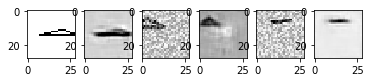

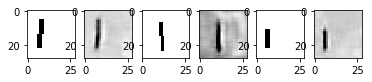

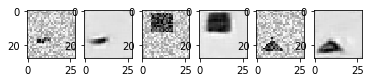

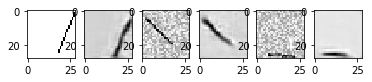

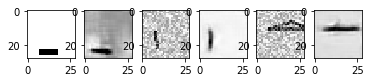

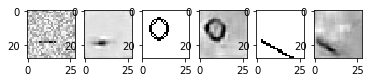

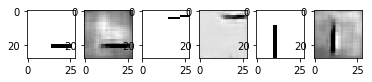

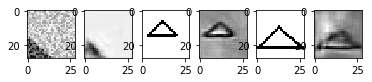

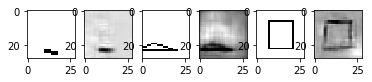

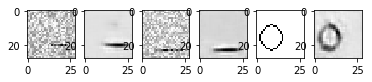

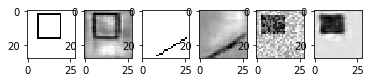

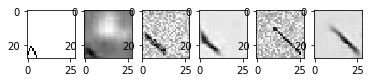

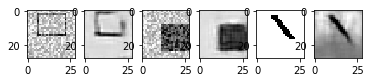

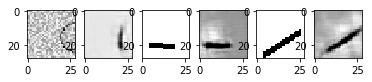

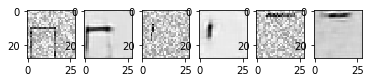

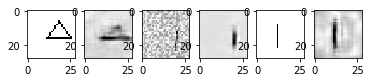

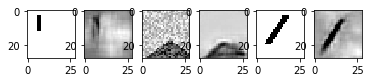

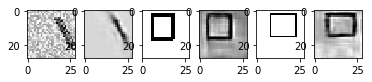

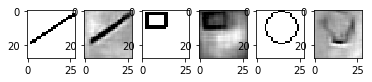

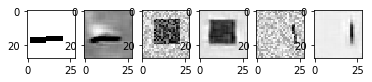

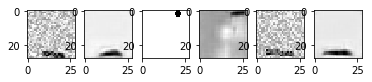

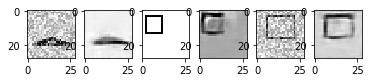

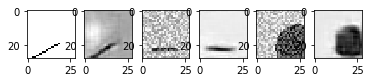

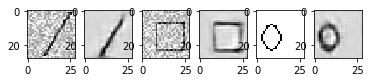

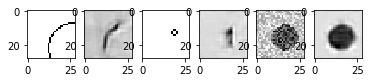

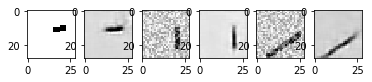

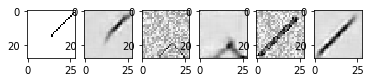

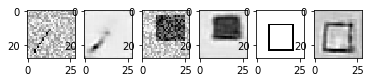

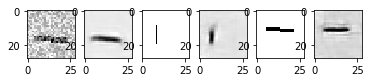

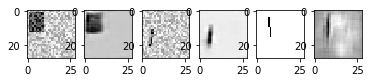

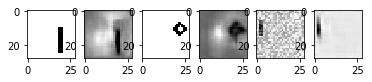

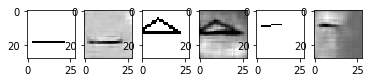

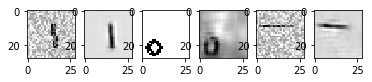

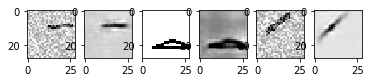

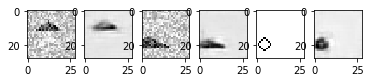

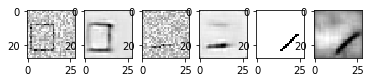

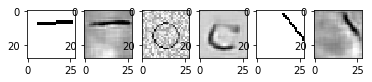

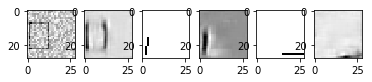

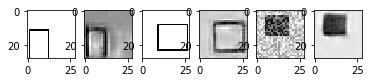

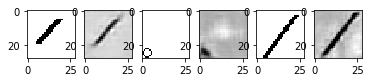

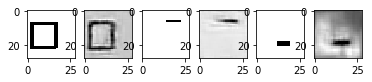

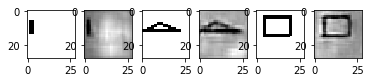

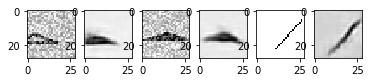

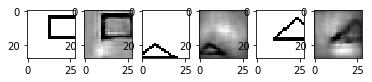

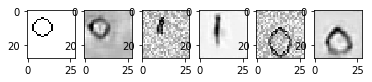

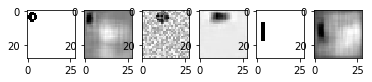

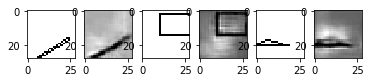

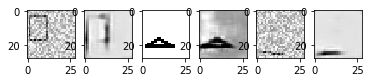

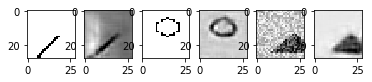

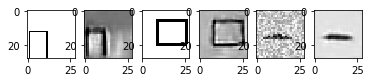

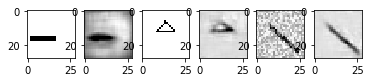

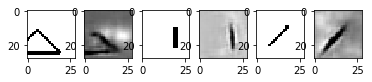

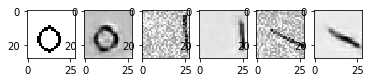

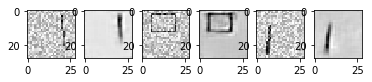

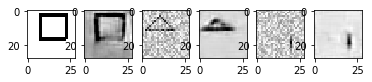

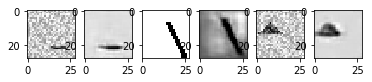

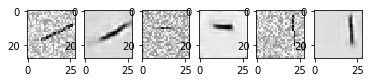

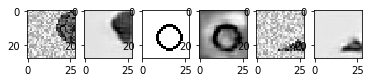

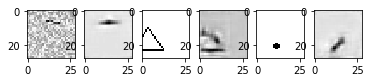

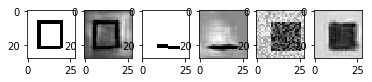

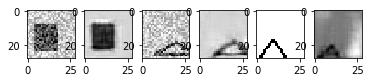

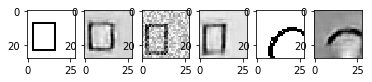

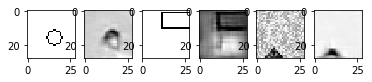

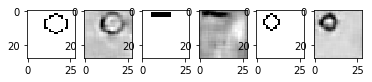

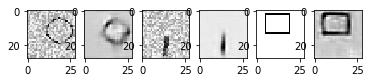

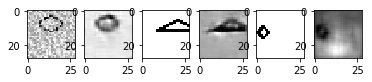

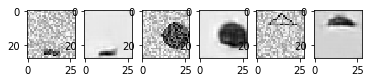

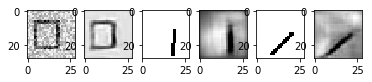

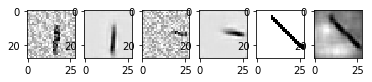

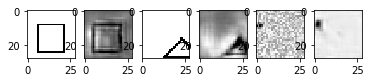

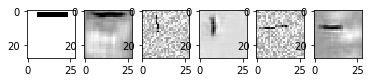

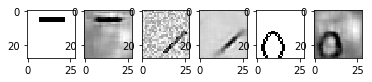

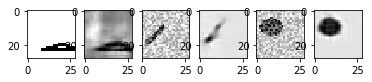

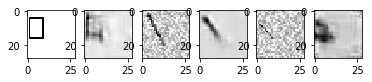

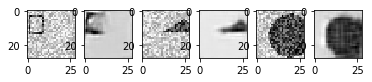

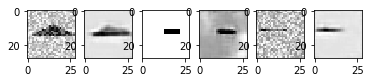

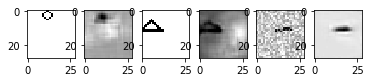

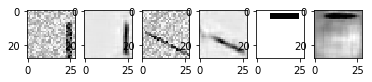

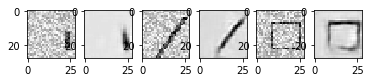

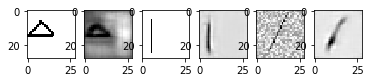

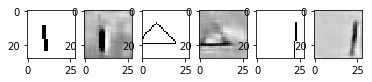

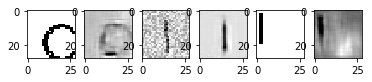

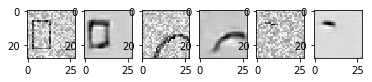

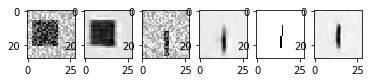

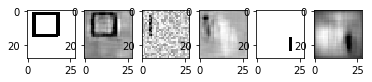

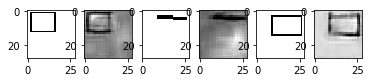

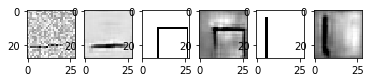

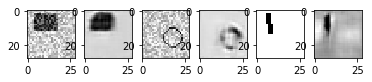

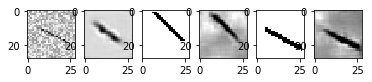

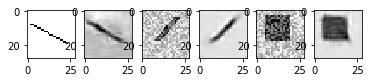

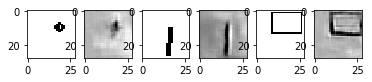

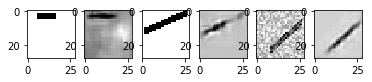

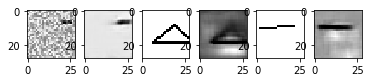

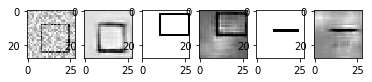

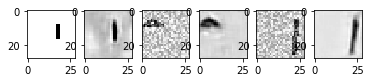

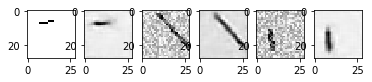

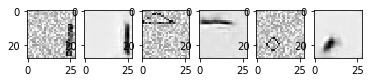

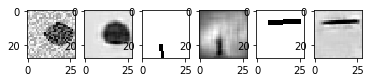

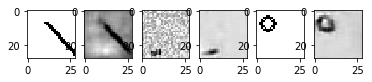

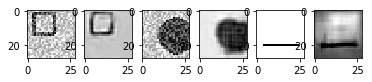

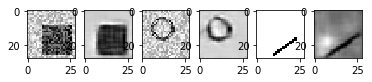

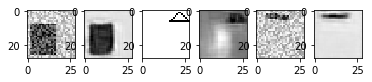

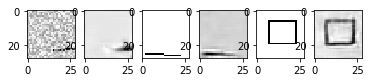

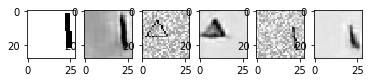

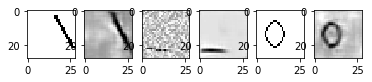

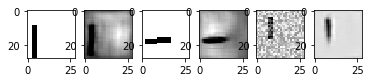

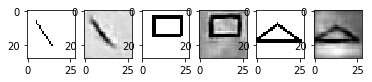

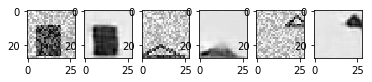

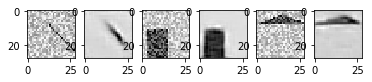

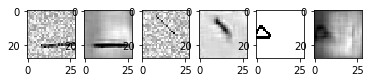

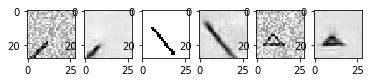

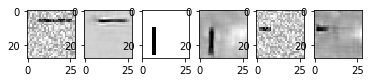

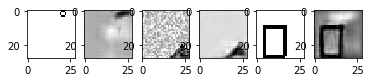

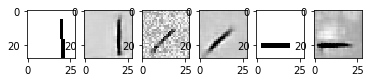

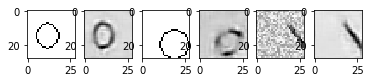

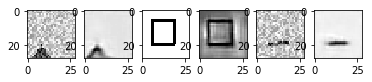

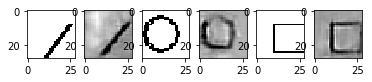

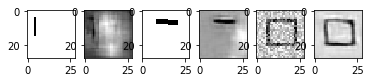

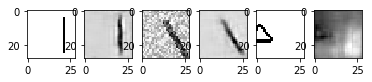

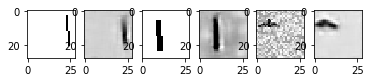

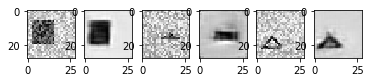

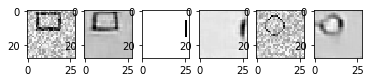

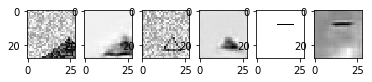

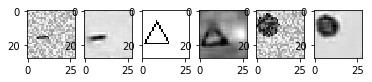

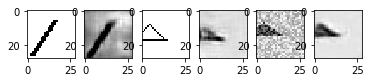

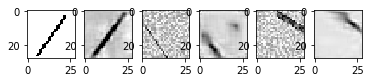

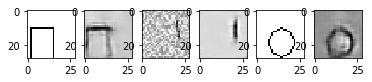

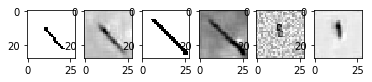

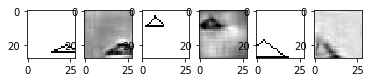

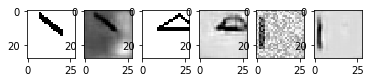

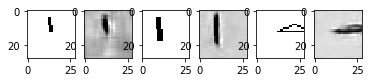

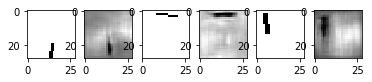

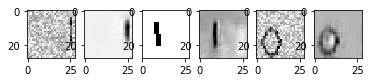

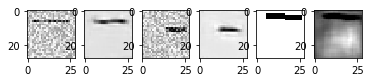

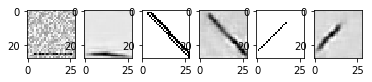

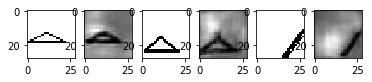

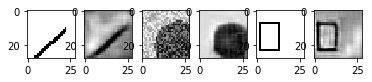

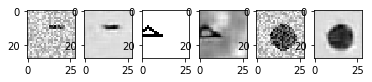

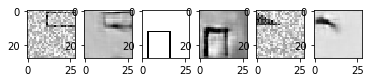

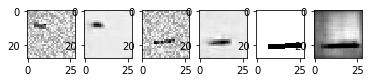

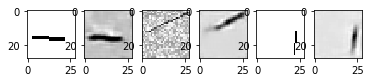

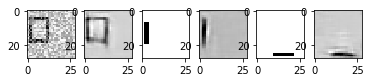

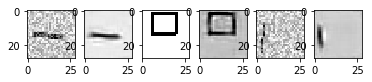

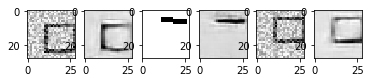

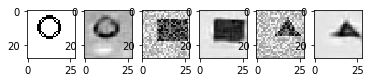

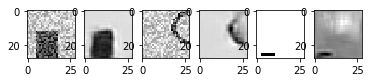

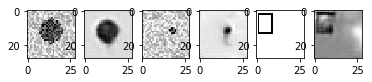

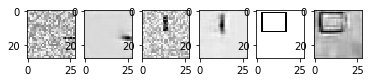

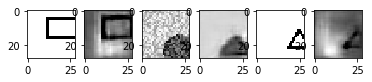

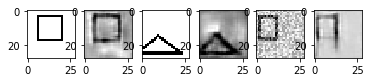

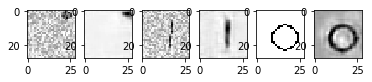

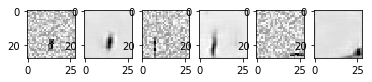

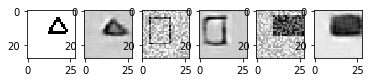

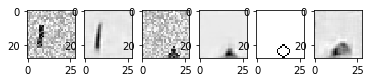

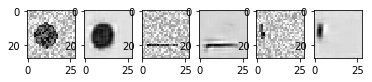

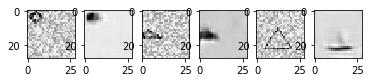

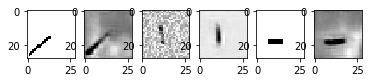

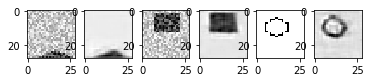

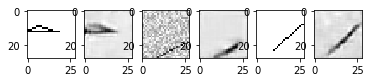

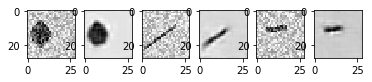

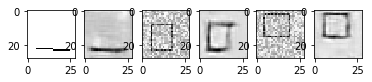

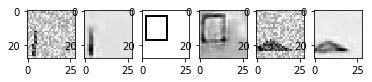

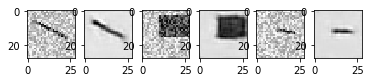

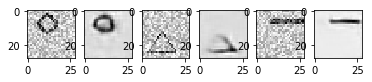

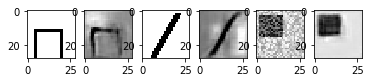

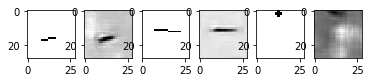

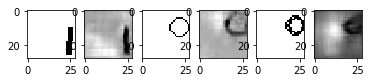

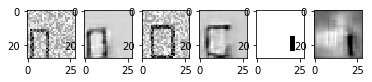

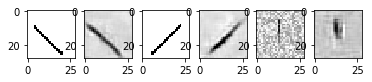

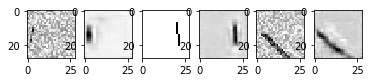

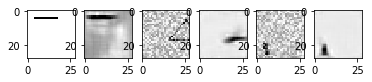

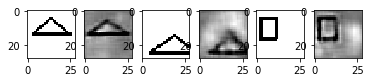

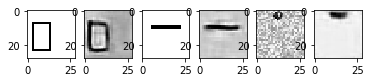

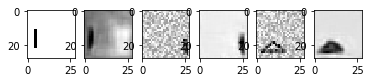

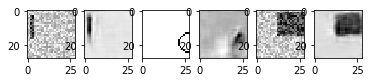

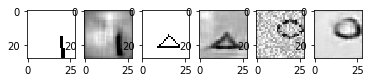

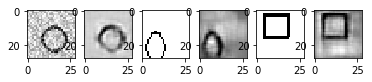

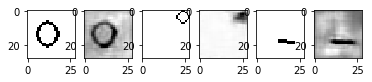

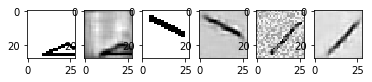

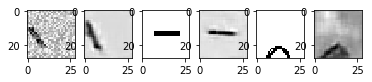

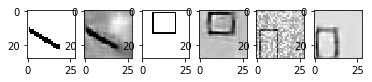

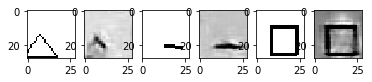

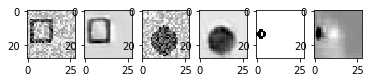

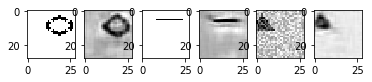

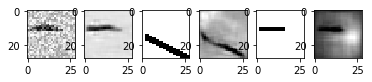

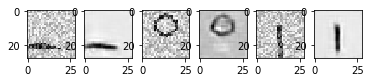

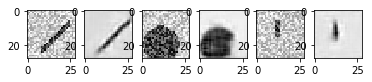

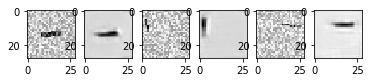

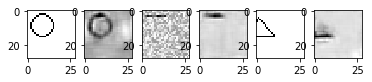

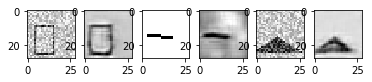

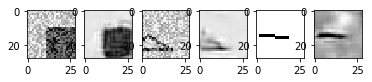

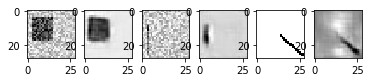

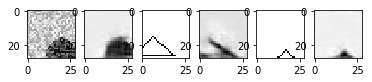

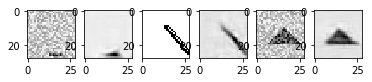

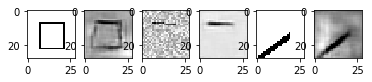

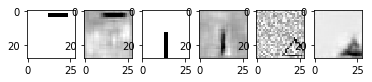

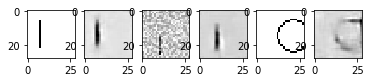

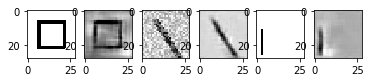

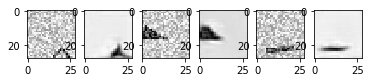

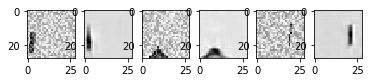

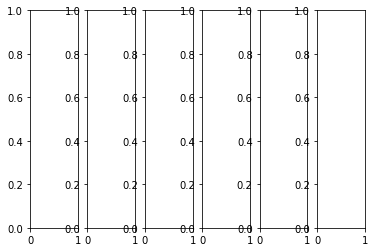

In [24]:
import matplotlib.pyplot as plt

obj = -1
for j in range(len(pred)):
    f, ax = plt.subplots(1,6)
    for i in range(6):
        if i % 2 == 0:
            obj = obj + 1
            if obj >= 600:
                break
            #print(obj)
            ax[i].imshow(x_test[obj].reshape(img_rows, img_cols), cmap=plt.get_cmap('gray'))
        else:
            #print()
            ax[i].imshow(pred[obj].reshape(img_rows, img_cols), cmap=plt.get_cmap('gray'))
    if obj >= 600:
        break
    plt.show()

In [25]:
from keras.models import model_from_json 
json_file = open("origin_cnn_model.json", "r") 
loaded_model_json = json_file.read() 
json_file.close() 
loaded_model = model_from_json(loaded_model_json)

In [26]:
loaded_model.load_weights("origin_cnn_model.h5") 
print("Loaded model from disk")

Loaded model from disk


In [27]:
loaded_model.compile(loss=keras.losses.categorical_crossentropy,
              optimizer=keras.optimizers.Adadelta(),
              metrics=['accuracy'])

In [28]:
loaded_model.evaluate(x_test, y_test)

1200/1200 [==============================] - 0s 131us/step


[0.04724142621778242, 0.9933333333333333]

In [29]:
loaded_model.evaluate(pred, y_test)

1200/1200 [==============================] - 0s 46us/step


[1.7464376485347748, 0.81]

In [ ]:
'''
#TEST 1
0.10420278875487289, 0.9822222222222222
2.323088133070204, 0.7855555555555556

#TEST2
0.04724142621778242, 0.9933333333333333
1.7464376485347748, 0.81
'''

In [33]:
get_layer_output = K.function([new_model.layers[0].input], [new_model.layers[11].output])

In [34]:
x_output = get_layer_output([x_train])

In [32]:
x_output.shape
p1 = model.predict(pred)
p1.shape

(600, 28, 28, 1)